In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
from textblob import TextBlob


In [3]:
import tweepy

In [19]:
consumer_key='DIFJW5pZ86e02FZeyet4TsMJz'
consumer_secret ='v1ZqyssRIqB5619N6DHU4rEcd3OkT8EZFcVfU6jwpFxaViXS0H'
access_token ='726188178995032064-J1FjjpDvGIU1i2rVyQyStKOckTkpfky'
access_token_secret ='85QklgO4jd38ZROiOS52npWgusAp9TZqRlXUn3T2lWiwq'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


public_tweets = api.search('Nivea')


for tweet in public_tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
        print('Positive')  
    elif analysis.sentiment[0]<0:
        print('Negative')   
    else:
        print('Neutral')

Check out this deal! Nivea Brand Day up to 30% off: https://t.co/jKblMqDyGF
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
そろそろ肌寒い季節だしよさんが
ガパオ作ってくれて一緒に食べてNIVEA塗りたくる神CMの再来を期待しているですけど花王さん、、、ないですか、、、
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Nivea__mc: Meu  pordosol ☀️🇧🇷☀️

~  my favorite color is sunset... watch more sunsets and relax your mind ! 

#pordosol #sun #sunset #s…
Sentiment(polarity=0.5625, subjectivity=0.75)
Positive
Meu  pordosol ☀️🇧🇷☀️

~  my favorite color is sunset... watch more sunsets and relax your mind ! 

#pordosol #sun… https://t.co/3YPvdGG0tP
Sentiment(polarity=0.5625, subjectivity=0.75)
Positive
@vaIencilo Minha pele fez a mesma coisa quando usei nivea kkkkkk eu não sei o que passar
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@ictasarimlar @benutandim2 Yeşil sabundan Nivea duş jeline geçmişler.
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@iboo6100 @1 nivea_creqmまでお願いします
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @alluxeweb: ＼フォ

In [20]:
# converting tweets into a dataframe w column name as Tweets
import pandas as pd

df = pd.DataFrame([tweets.text for tweets in public_tweets], columns=['Tweets'])

# adding columns for the resp polarity and subjectivity
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df['polarity'] = df['Tweets'].apply(polarity)
df['subjectivity'] = df['Tweets'].apply(subjectivity)
df.head(10)

,Tweets,polarity,subjectivity
0,Check out this deal! Nivea Brand Day up to 30%...,0.0000,0.00
1,そろそろ肌寒い季節だしよさんが\nガパオ作ってくれて一緒に食べてNIVEA塗りたくる神CMの...,0.0000,0.00
2,RT @Nivea__mc: Meu pordosol ☀️🇧🇷☀️\n\n~ my f...,0.5625,0.75
3,Meu pordosol ☀️🇧🇷☀️\n\n~ my favorite color i...,0.5625,0.75
4,@vaIencilo Minha pele fez a mesma coisa quando...,0.0000,0.00
5,@ictasarimlar @benutandim2 Yeşil sabundan Nive...,0.0000,0.00
6,@iboo6100 @1 nivea_creqmまでお願いします,0.0000,0.00
7,RT @alluxeweb: ＼フォロー&amp;RTプレゼント🎁／\n月下美人の峠道😉🌾企...,0.0000,0.00
8,RT @byfairyfern: เจอแล้ว cleansing ในเซเว่นที่...,0.0000,0.00
9,RT @dadarssm: มารวบรวมbodycareที่เราใช้​ แล้วช...,0.0000,0.00


In [21]:
# To calculate if the sentiment_analysis is +ve, -ve or neutral
# if ratio >1 then +ve, if ratio = 0 then neutral and if <0 then -ve

def ratio(x):
 if x > 0:
    return 1
 elif x == 0:
        return 0
 else:
    return -1

df['sentiment_analysis'] = df['polarity'].apply(ratio)

df


,Tweets,polarity,subjectivity,sentiment_analysis
0,Check out this deal! Nivea Brand Day up to 30%...,0.0000,0.00,0
1,そろそろ肌寒い季節だしよさんが\nガパオ作ってくれて一緒に食べてNIVEA塗りたくる神CMの...,0.0000,0.00,0
2,RT @Nivea__mc: Meu pordosol ☀️🇧🇷☀️\n\n~ my f...,0.5625,0.75,1
3,Meu pordosol ☀️🇧🇷☀️\n\n~ my favorite color i...,0.5625,0.75,1
4,@vaIencilo Minha pele fez a mesma coisa quando...,0.0000,0.00,0
5,@ictasarimlar @benutandim2 Yeşil sabundan Nive...,0.0000,0.00,0
6,@iboo6100 @1 nivea_creqmまでお願いします,0.0000,0.00,0
7,RT @alluxeweb: ＼フォロー&amp;RTプレゼント🎁／\n月下美人の峠道😉🌾企...,0.0000,0.00,0
8,RT @byfairyfern: เจอแล้ว cleansing ในเซเว่นที่...,0.0000,0.00,0
9,RT @dadarssm: มารวบรวมbodycareที่เราใช้​ แล้วช...,0.0000,0.00,0


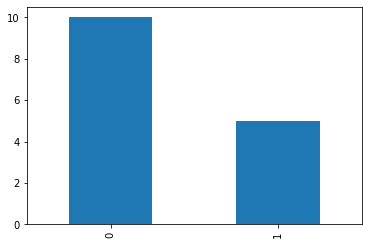

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting count graph
df['sentiment_analysis'].value_counts().plot(kind = 'bar')